In [7]:
# 주요 라이브러리 import
import warnings
warnings.filterwarnings(action='ignore')
import time
from IPython.display import Image
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet

from matplotlib import rc, font_manager
import matplotlib.font_manager as fm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# 디렉토리 및 파일 이름에 맞추어 변경
#font_location = '/Library/Fonts/Arial Unicode.ttf'#윈도우안에있는 폰트파일주소.
# font_location = './NanumGothic.ttf'
# font_name = fm.FontProperties(fname=font_location).get_name()
# rc('font', family=font_name)

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm  # 폰트 관련 용도
 
%config InlineBackend.figure_format = 'retina'
 
#!apt -qq -y install fonts-nanum
# 여기까지하고 런타임 다시 시작!!-----> 이 셀부터 설치빼고 다시 실행

# import matplotlib.font_manager as fm
# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font_name = fm.FontProperties(fname=fontpath, size=9).get_name()
# plt.rc('font', family=font_name) 
# print(font_name)

# fm._rebuild()
# plt.title('안녕!')


In [8]:
!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [9]:
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=fontpath, size=9).get_name()
plt.rc('font', family=font_name) 
print(font_name)

NanumBarunGothic


Text(0.5, 1.0, '안녕!')

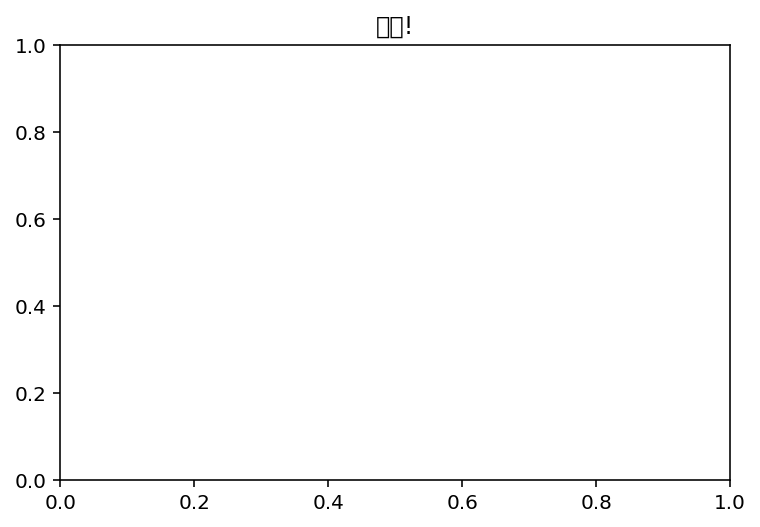

In [10]:
plt.title('안녕!')

In [43]:
tesla_df = pd.read_csv("/content/TSLA.csv",
                         encoding='utf-8')
tesla_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-20,61.301998,61.830002,60.046001,60.501999,60.501999,30747000
1,2017-04-21,60.400002,61.279999,60.084000,61.119999,61.119999,22549000
2,2017-04-24,61.844002,62.110001,61.203999,61.605999,61.605999,25417500
3,2017-04-25,61.599998,62.796001,61.172001,62.757999,62.757999,33688500
4,2017-04-26,62.473999,62.900002,61.799999,62.034000,62.034000,23475000
...,...,...,...,...,...,...,...
1254,2022-04-12,997.640015,1021.190002,976.599976,986.950012,986.950012,21992000
1255,2022-04-13,981.080017,1026.239990,973.099976,1022.369995,1022.369995,18373700
1256,2022-04-14,999.289978,1012.710022,982.190002,985.000000,985.000000,19444000
1257,2022-04-18,989.030029,1014.919983,973.409973,1004.289978,1004.289978,17238400


In [44]:
tesla_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [45]:
tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])

In [46]:
tesla_df.set_index('Date', inplace=True)

In [47]:
tesla_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-20,61.301998,61.830002,60.046001,60.501999,60.501999,30747000
2017-04-21,60.400002,61.279999,60.084000,61.119999,61.119999,22549000
2017-04-24,61.844002,62.110001,61.203999,61.605999,61.605999,25417500
2017-04-25,61.599998,62.796001,61.172001,62.757999,62.757999,33688500
2017-04-26,62.473999,62.900002,61.799999,62.034000,62.034000,23475000
...,...,...,...,...,...,...
2022-04-12,997.640015,1021.190002,976.599976,986.950012,986.950012,21992000
2022-04-13,981.080017,1026.239990,973.099976,1022.369995,1022.369995,18373700
2022-04-14,999.289978,1012.710022,982.190002,985.000000,985.000000,19444000


In [49]:
tesla_train_df = tesla_df.iloc[:-5]
tesla_test_df = tesla_df.iloc[-5:]

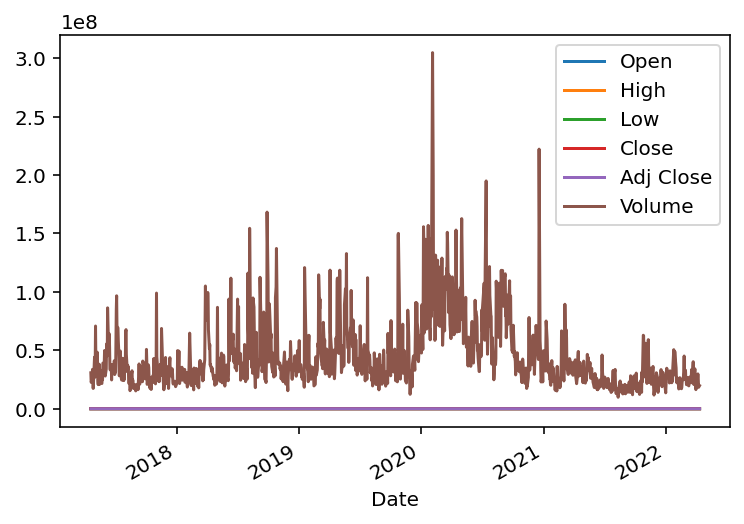

In [51]:
tesla_train_df.plot()

In [36]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [52]:
arima = ARIMA(tesla_train_df.Close.values, order=(10, 1, 2))

In [53]:
arima_fit = arima.fit(trend='c', full_output=True)

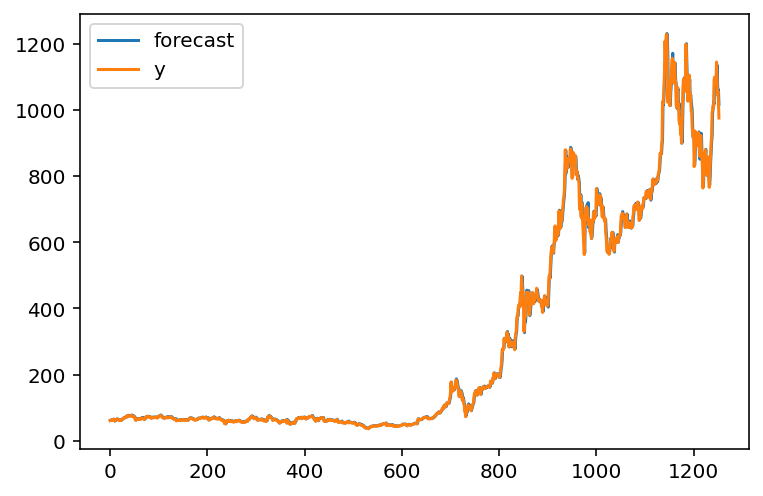

In [54]:
fig = arima_fit.plot_predict()

In [55]:
forecast_data = arima_fit.forecast(steps=5)
forecast_data

(array([971.68936581, 979.05475698, 974.37731283, 972.83903702,
        968.77170708]),
 array([17.37226865, 24.52298778, 29.700578  , 34.38633496, 38.73508899]),
 array([[ 937.64034492, 1005.7383867 ],
        [ 930.99058413, 1027.11892983],
        [ 916.16524963, 1032.58937603],
        [ 905.44305893, 1040.23501511],
        [ 892.85232773, 1044.69108643]]))

In [56]:
pred_y = forecast_data[0].tolist()
pred_y

[971.6893658136333,
 979.0547569808731,
 974.3773128308627,
 972.8390370238127,
 968.7717070790891]

In [58]:
test_y = tesla_test_df.Close.values.tolist()
test_y

[986.950012, 1022.369995, 985.0, 1004.289978, 1028.150024]

In [59]:
r2_score(test_y, pred_y)

-3.3093254439742505

In [102]:
year_5_mse = mean_squared_error(test_y, pred_y)
year_5_mse

1347.3769716040397

In [62]:
tesla_test_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-12,997.640015,1021.190002,976.599976,986.950012,986.950012,21992000
2022-04-13,981.080017,1026.239990,973.099976,1022.369995,1022.369995,18373700
2022-04-14,999.289978,1012.710022,982.190002,985.000000,985.000000,19444000
2022-04-18,989.030029,1014.919983,973.409973,1004.289978,1004.289978,17238400
2022-04-19,1005.059998,1034.939941,995.330017,1028.150024,1028.150024,16531100


In [64]:
result_df = pd.DataFrame({
      'Price' : tesla_test_df.index,
      'pred_y' : pred_y,
      'test_y' : test_y
})
result_df

,Price,pred_y,test_y
0,2022-04-12,971.689366,986.950012
1,2022-04-13,979.054757,1022.369995
2,2022-04-14,974.377313,985.000000
3,2022-04-18,972.839037,1004.289978
4,2022-04-19,968.771707,1028.150024


In [65]:
from fbprophet import Prophet

In [81]:
tesla_df_fb = pd.read_csv('/content/TSLA.csv')
tesla_df_fb

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-20,61.301998,61.830002,60.046001,60.501999,60.501999,30747000
1,2017-04-21,60.400002,61.279999,60.084000,61.119999,61.119999,22549000
2,2017-04-24,61.844002,62.110001,61.203999,61.605999,61.605999,25417500
3,2017-04-25,61.599998,62.796001,61.172001,62.757999,62.757999,33688500
4,2017-04-26,62.473999,62.900002,61.799999,62.034000,62.034000,23475000
...,...,...,...,...,...,...,...
1254,2022-04-12,997.640015,1021.190002,976.599976,986.950012,986.950012,21992000
1255,2022-04-13,981.080017,1026.239990,973.099976,1022.369995,1022.369995,18373700
1256,2022-04-14,999.289978,1012.710022,982.190002,985.000000,985.000000,19444000
1257,2022-04-18,989.030029,1014.919983,973.409973,1004.289978,1004.289978,17238400


In [82]:
tesla_df_fb = tesla_df_fb.rename(columns={'Close':'y', 'Date':'ds'})
tesla_df_fb

,ds,Open,High,Low,y,Adj Close,Volume
0,2017-04-20,61.301998,61.830002,60.046001,60.501999,60.501999,30747000
1,2017-04-21,60.400002,61.279999,60.084000,61.119999,61.119999,22549000
2,2017-04-24,61.844002,62.110001,61.203999,61.605999,61.605999,25417500
3,2017-04-25,61.599998,62.796001,61.172001,62.757999,62.757999,33688500
4,2017-04-26,62.473999,62.900002,61.799999,62.034000,62.034000,23475000
...,...,...,...,...,...,...,...
1254,2022-04-12,997.640015,1021.190002,976.599976,986.950012,986.950012,21992000
1255,2022-04-13,981.080017,1026.239990,973.099976,1022.369995,1022.369995,18373700
1256,2022-04-14,999.289978,1012.710022,982.190002,985.000000,985.000000,19444000
1257,2022-04-18,989.030029,1014.919983,973.409973,1004.289978,1004.289978,17238400


In [83]:
tesla_df_fb = tesla_df_fb[['ds', 'y']]
tesla_df_fb


,ds,y
0,2017-04-20,60.501999
1,2017-04-21,61.119999
2,2017-04-24,61.605999
3,2017-04-25,62.757999
4,2017-04-26,62.034000
...,...,...
1254,2022-04-12,986.950012
1255,2022-04-13,1022.369995
1256,2022-04-14,985.000000
1257,2022-04-18,1004.289978


In [84]:
prophet = Prophet(
    seasonality_mode='multiplicative',
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True
)
prophet.fit(tesla_df_fb)

In [87]:
future_data = prophet.make_future_dataframe(periods = 5, freq = 'd')
forecast_data2 = prophet.predict(future_data)
forecast_data2[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1259,2022-04-20,1092.405066,1054.206365,1133.426658
1260,2022-04-21,1088.741407,1050.567571,1125.381225
1261,2022-04-22,1091.201472,1053.525137,1128.536847
1262,2022-04-23,943.553525,904.703359,983.682946
1263,2022-04-24,945.838858,911.595310,982.326037


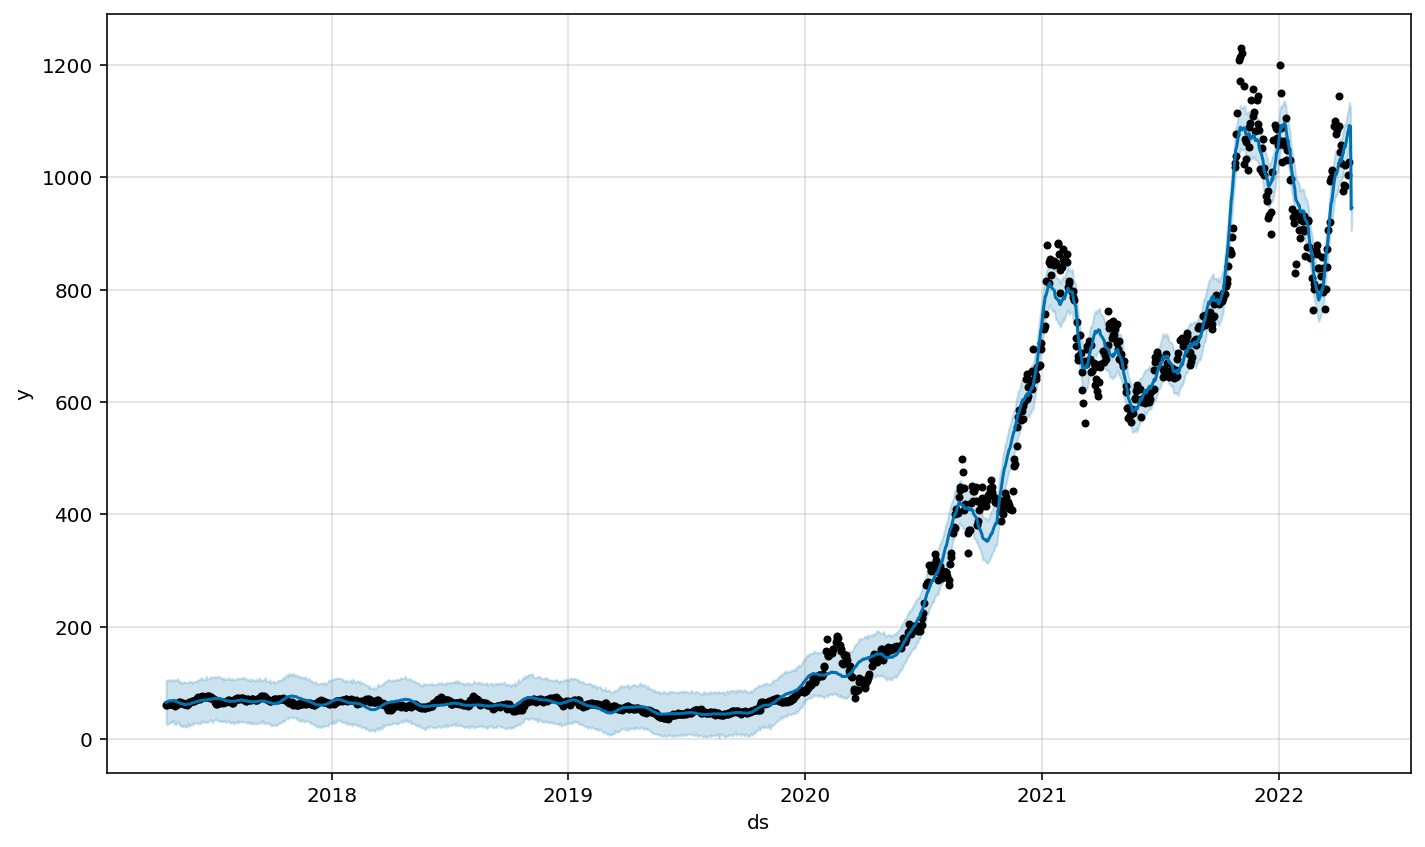

In [88]:
fig = prophet.plot(forecast_data2)

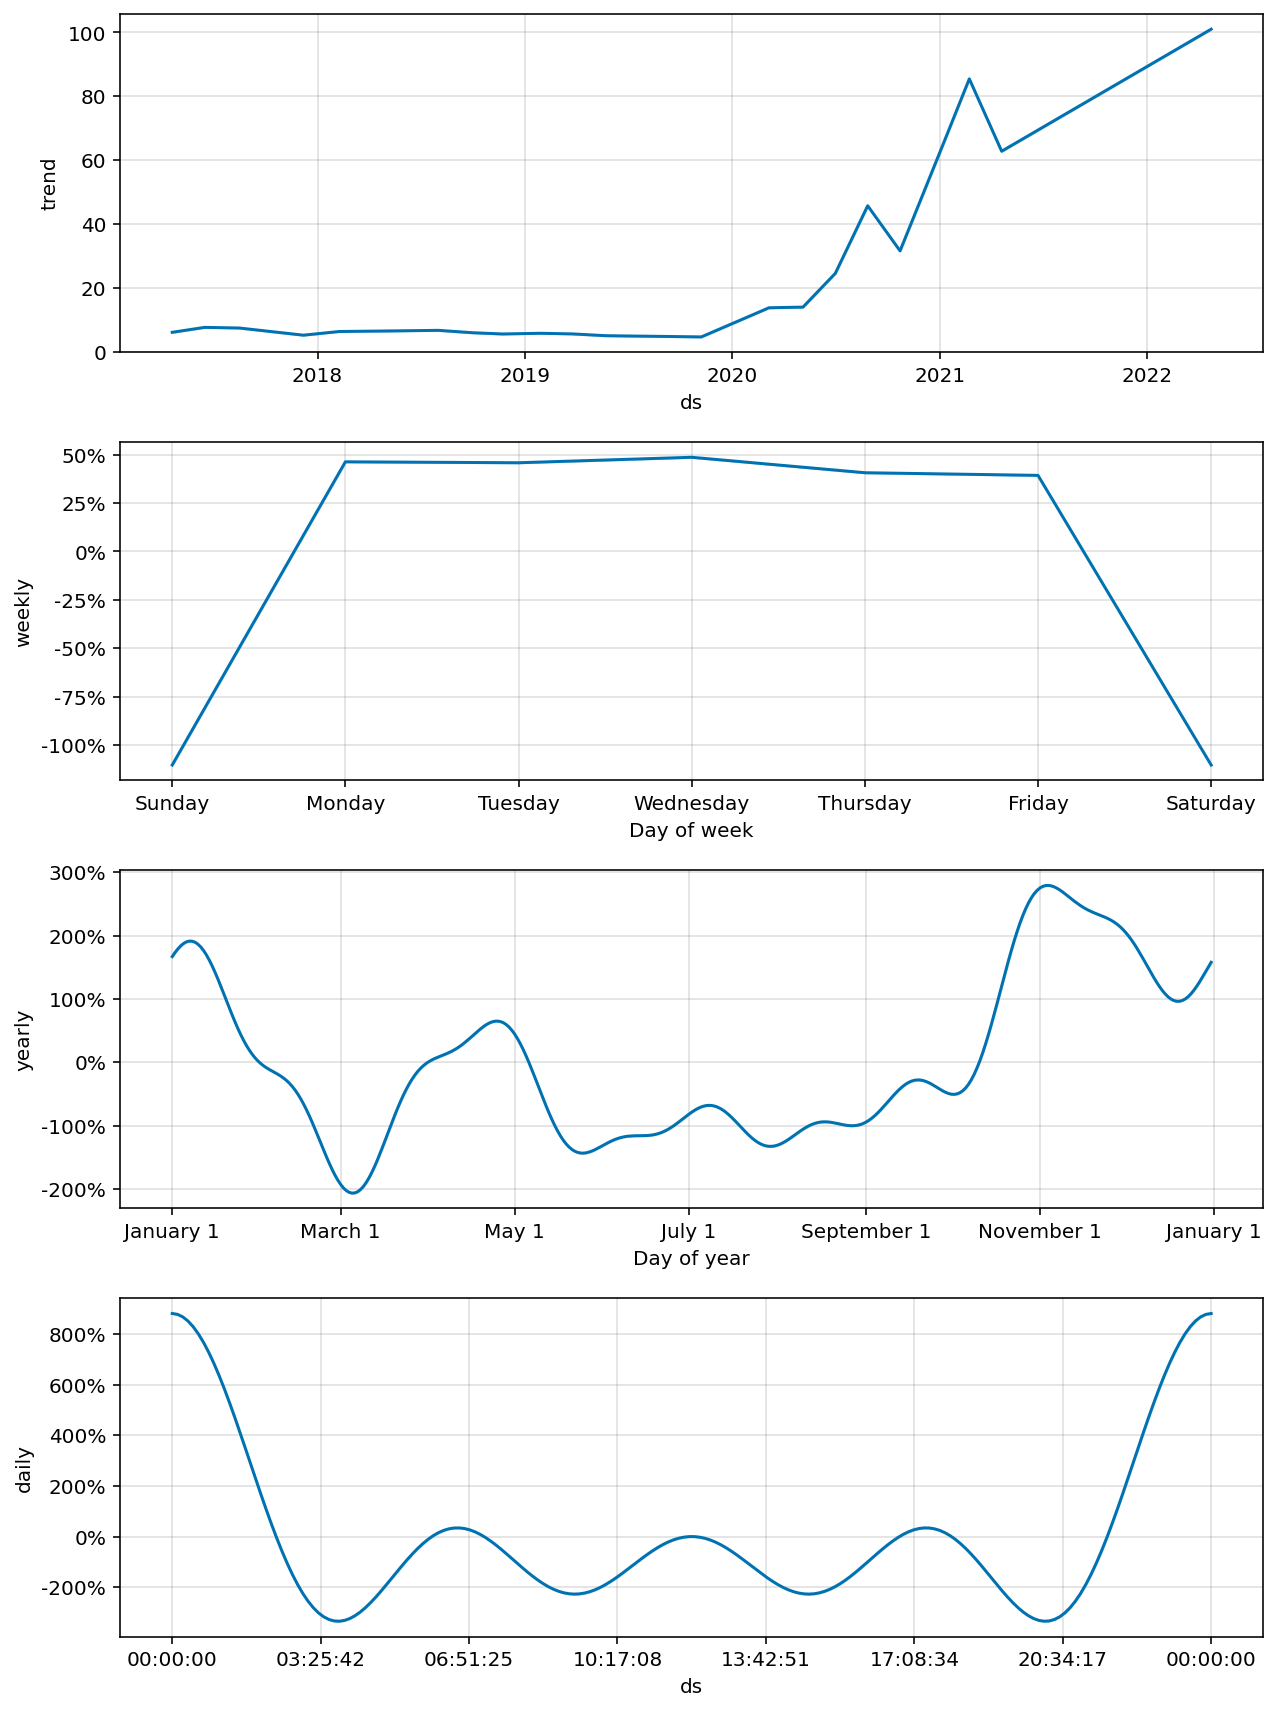

In [89]:
fig2 = prophet.plot_components(forecast_data2)

In [90]:
tesla_df_fb_train = tesla_df_fb.iloc[:-5]
tesla_df_fb_test = tesla_df_fb.iloc[-5:]

In [91]:
prophet2 = Prophet(
    seasonality_mode='multiplicative',
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True
)
prophet2.fit(tesla_df_fb_train)

In [92]:
future_data2 = prophet2.make_future_dataframe(periods = 5, freq = 'd')
forecast_data3 = prophet.predict(future_data2)
forecast_data3[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1254,2022-04-12,1050.448821,1010.691193,1089.609914
1255,2022-04-13,1057.670835,1022.637482,1098.432619
1256,2022-04-14,1054.394554,1017.439052,1090.741453
1257,2022-04-15,1057.938320,1017.228238,1095.740133
1258,2022-04-16,913.250295,875.946381,948.566247


In [96]:
result_df2 = pd.DataFrame({
    'day' : tesla_df_fb_test['ds'],
    'real_data' : tesla_df_fb_test['y'],
    'pred_data' : forecast_data3['yhat'].tail(5)
})
result_df2

,day,real_data,pred_data
1254,2022-04-12,986.950012,1050.448821
1255,2022-04-13,1022.369995,1057.670835
1256,2022-04-14,985.000000,1054.394554
1257,2022-04-18,1004.289978,1057.938320
1258,2022-04-19,1028.150024,913.250295


In [99]:
pb_mse = mean_squared_error(result_df2['real_data'], result_df2['pred_data'])
pb_mse

5234.7888870024835

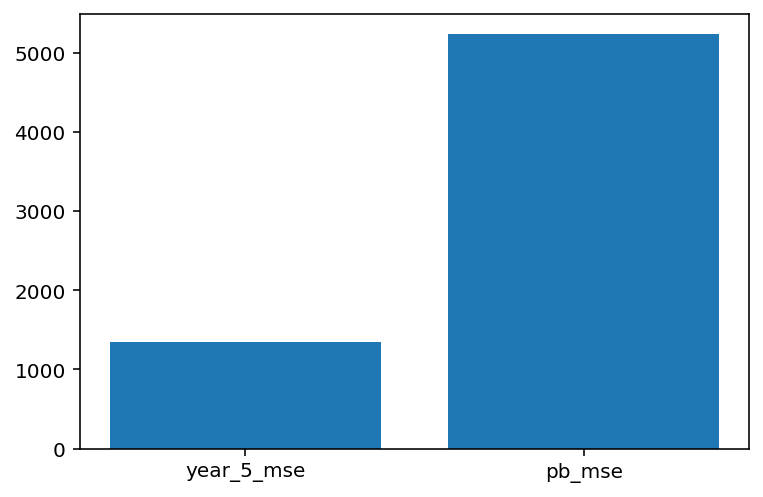

In [105]:
x = np.arange(2)
plt.bar(x, height= [year_5_mse, pb_mse])
plt.xticks(x, ['year_5_mse','pb_mse'
               ]);